# **Setup Guide**

1. ลง Library ที่ต้องใช้ในส่วนของ Imports โดยใช้ pip install ในส่วนของ Terminal แล้วตามด้วยชื่อ Library ที่ต้องการลง

2. ส่วนของ File Path ต่างๆใน Code นี้ต้องแก้ให้เป็น Path ปัจจุบันของผู้ใช้

3. ในส่วนที่สามารถใส่รูปเข้าไปเองได้ ให้เปิดโฟลเดอร์ alphabet แล้วนำรูปที่ต้องการมาใส่ แล้วรันโค้ดในส่วนนั้นซ้ำ

# **Imports**

In [2]:
# Common
import os 
import cv2
import keras
import numpy as np
import tensorflow as tf

# Data 
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

# Data Visualization 
import plotly.express as px
import matplotlib.pyplot as plt

# Model 
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Dense, GlobalAvgPool2D

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

# **Data Information**

ในส่วนของ file_path ให้แก้เป็น path ปัจจุบัน ของ user

โหลด Dataset ที่จะใช้ Train Model เข้ามาดัวย Library Pandas

In [3]:
%%time

# Specify Data Path
file_path = 'C://Users//PP\'s Notebook//Desktop//PythonProject//ML//handWrittenDigitRecog//Finally//dataset//mnist_train.csv'

# Column Names
names = ['class']
for id in range(1,785):
    names.append(id)

# Load Data
df = pd.read_csv(file_path,header=None, names=names)
df.head()

CPU times: total: 5.77 s
Wall time: 6.09 s


,class,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


ทำการ Mapping เพื่อระบุว่าเป็นตัวเลขไหน

In [4]:
class_mapping = {}
number = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for i in range(len(number)):
    class_mapping[i] = number[i]
class_mapping

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9'}

In [5]:
df['class'].map(class_mapping).unique()

array(['5', '0', '4', '1', '9', '2', '3', '6', '7', '8'], dtype=object)

In [6]:
names = df['class'].value_counts().keys().map(class_mapping)
values = df['class'].value_counts()

# **Class Distribution Represent**

In [7]:
# Plot Class Distribution
fig = px.pie(
    names=names,
    values=values,
    height=800,
    title='Class Distribution'
)
fig.update_layout({'title':{'x':0.5}})
fig.show()

In [8]:
# Plot Class Distribution
fig = px.bar(
    x=names,
    y=values,
    height=800,
    title='Class Distribution'
)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# **Data Loading**

In [9]:
y_full = df.pop('class')
x_full = df.to_numpy().reshape(-1,28,28, 1)

In [10]:
splitter = StratifiedShuffleSplit(n_splits=3,test_size=0.2)
for train_ids, test_ids in splitter.split(x_full, y_full):
    X_train_full, y_train_full = x_full[train_ids], y_full[train_ids].to_numpy()
    X_test, y_test = x_full[test_ids], y_full[test_ids].to_numpy()

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1)

# **Data Visualization**

ข้อมูลใน dataset ที่ใช้จะอยู่ในรูป matrix 28x28 แล้วมี Label กำกับว่าเป็นข้อมูลของอะไร

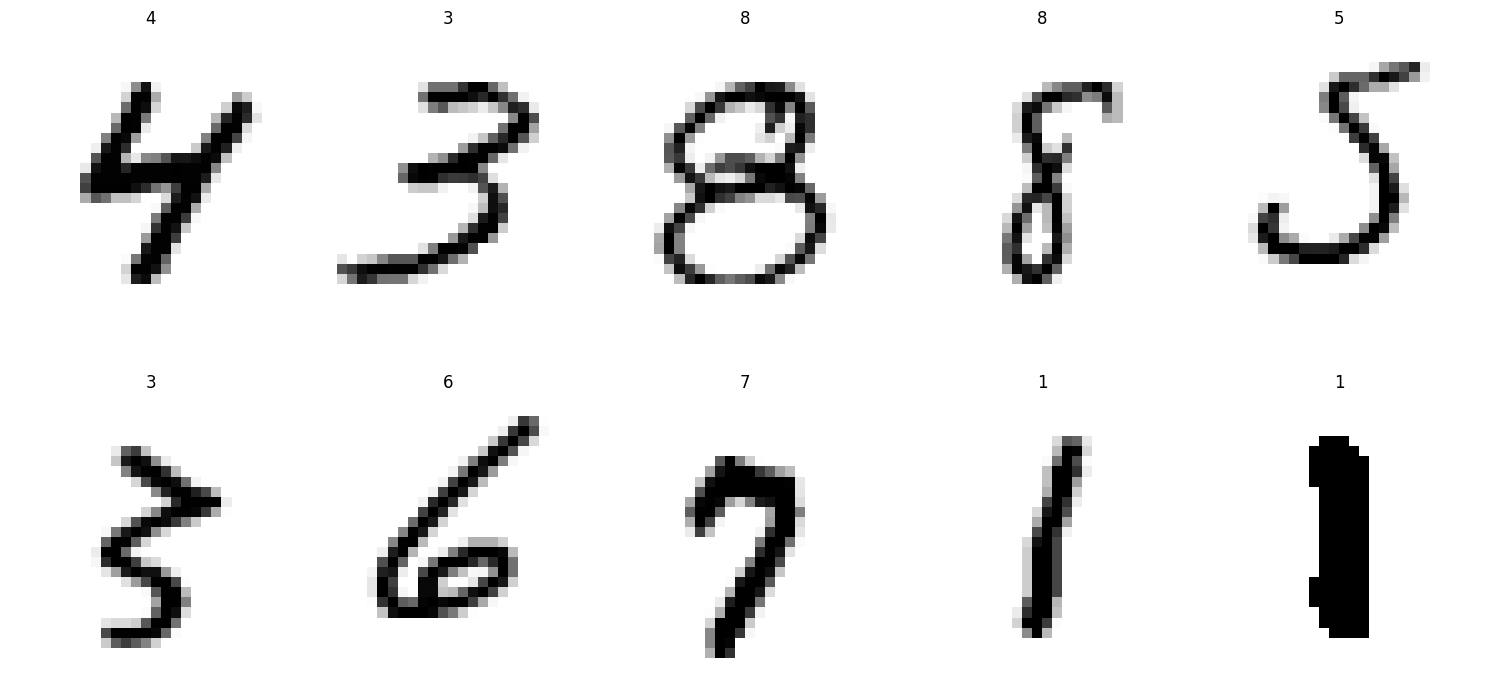

In [12]:
plt.figure(figsize=(15,8))
for i in range(1, 11):
    
    id = np.random.randint(len(X_train))
    image, label = tf.squeeze(X_train[id]), class_mapping[int(y_train[id])]
    
    plt.subplot(2,5,i)
    plt.imshow(image, cmap='binary')
    plt.title(label)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

# **Custom Model**

เอาข้อมูลที่ได้จาก dataset มาสร้างเป็น Model สำหรับทำนายข้อมูลที่จะรับเข้ามั้ย

In [13]:
# # Model Architecture
# model = Sequential([
#     Conv2D(32, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal', input_shape=(28, 28, 1)),
#     MaxPool2D(),

#     BatchNormalization(),
#     Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal'),
#     BatchNormalization(),
#     Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal'),
#     MaxPool2D(),

#     BatchNormalization(),
#     Conv2D(128, kernel_size=3, padding='same', kernel_initializer='he_normal'),
#     BatchNormalization(),
#     Conv2D(128, kernel_size=3, padding='same', kernel_initializer='he_normal'),
#     MaxPool2D(),

#     BatchNormalization(),
#     Conv2D(256, kernel_size=3, padding='same', kernel_initializer='he_normal'),
#     BatchNormalization(),
#     Conv2D(256, kernel_size=3, padding='same', kernel_initializer='he_normal'),
  
#     GlobalAvgPool2D(),
#     Dense(256, activation='relu'),
#     Dropout(0.2),
#     Dense(26, activation='sigmoid')
# ])

# # Compile
# model.compile(
#     loss='sparse_categorical_crossentropy',
#     optimizer='adam',
#     metrics=['accuracy']
# )

# # Callbacks
# cbs = [EarlyStopping(patience=3, restore_best_weights=True), ModelCheckpoint("mnistPred.h5", save_best_only=True)]

# # Training
# model.fit(
#     X_train, y_train,
#     validation_data=(X_valid, y_valid),
#     epochs=50,
#     callbacks=cbs
# )

# **Evaluation**

มาดูรายละเอียดภายในโมเดลด้วยคำสั่ง model.summary

In [14]:
model = load_model('C://Users//PP\'s Notebook//Desktop//PythonProject//ML//handWrittenDigitRecog//Finally//model//mnistPred.h5')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 32)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 32)         128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 64)         256       
 hNormalization)                                                 
                                                        

# **Accuracy Test**

ทดสอบประสิทธิภาพโมเดล

In [16]:
model.evaluate(X_test,y_test)

375/375 [==============================] - 4s 9ms/step - loss: 0.0653 - accuracy: 0.9802


[0.06534919887781143, 0.9801666736602783]

# **Model Predictions**

ทดลองใช้โมเดลทำนายข้อมูลจาก Dataset ที่แบ่งไว้เป็น Test set

1/1 [==============================] - 0s 40ms/step


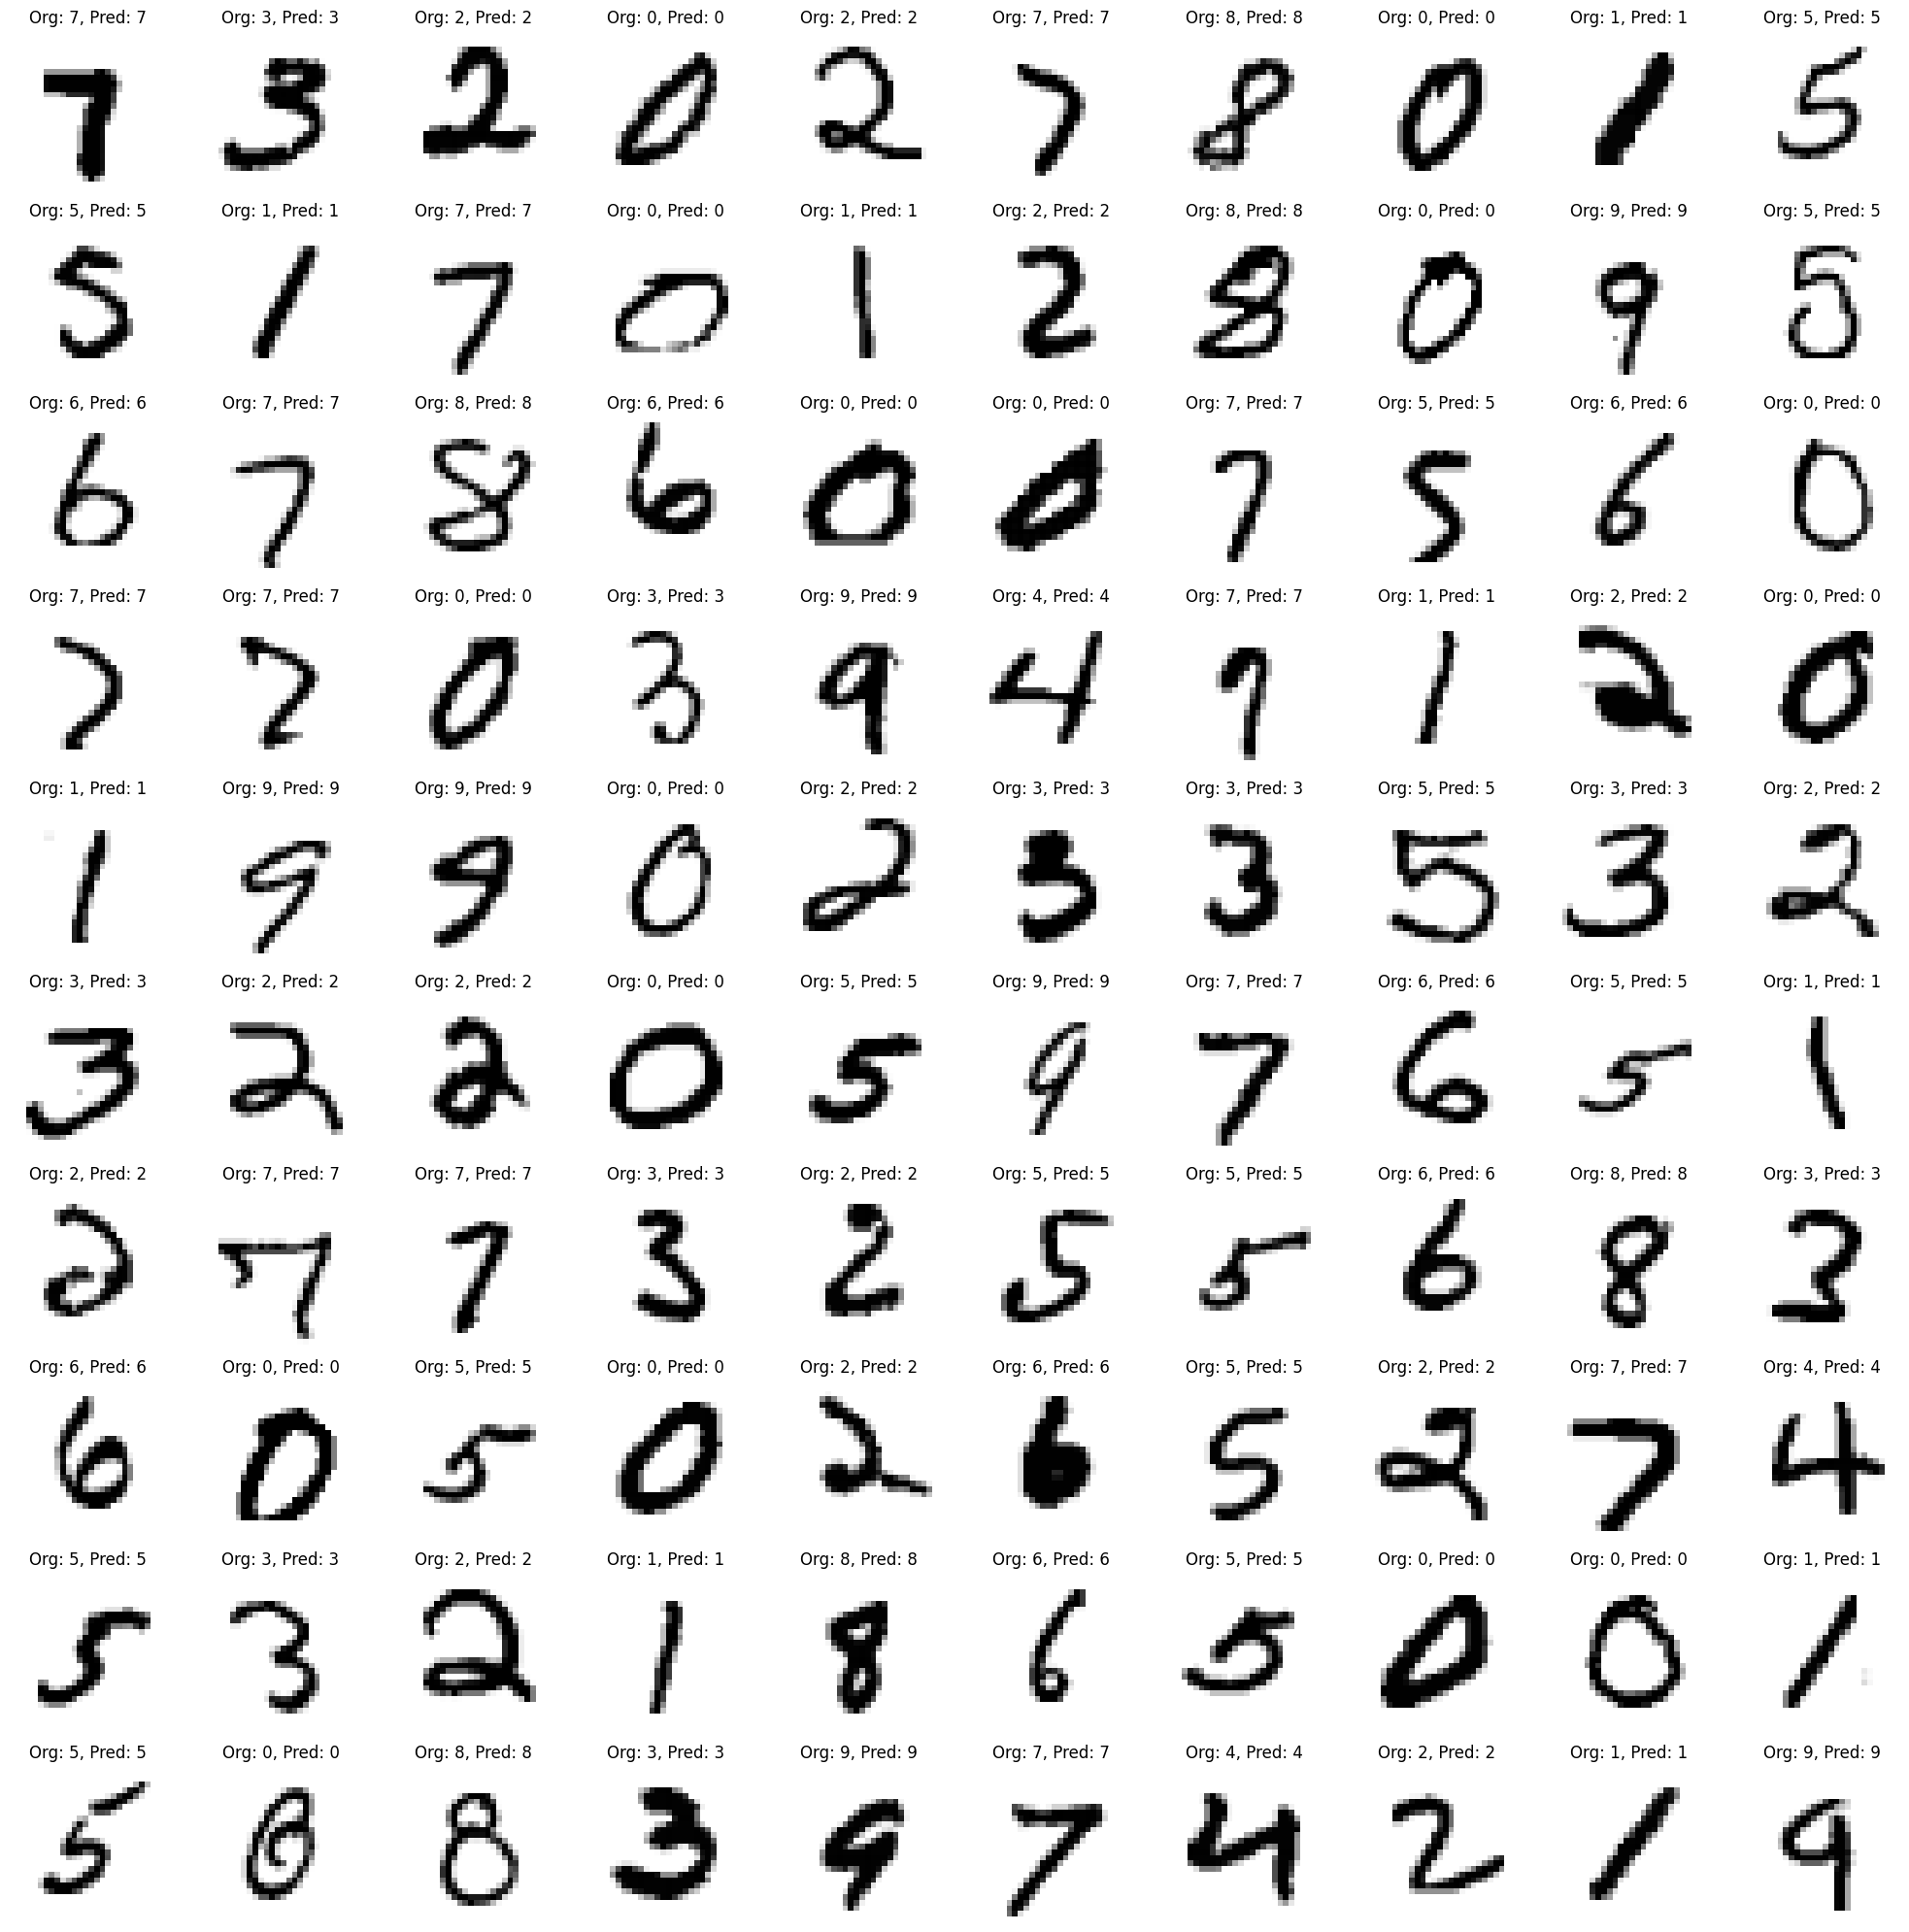

In [17]:
plt.figure(figsize=(20,20))
for i in range(1, 101):
    
    id = np.random.randint(len(X_test))
    image, label = X_test[id].reshape(28,28), class_mapping[int(y_test[id])]
    pred = class_mapping[int(np.argmax(model.predict(image.reshape(-1,28,28,1))))]
    
    plt.subplot(10,10,i)
    plt.imshow(image, cmap='binary')
    plt.title(f"Org: {label}, Pred: {pred}")
    plt.axis('off')
    
plt.tight_layout()
plt.show()

# ***TEST WITH YOUR HANDWRITTEN***

ทีนี้เรามาลองใช้ลายมือเราในการทดสอบกันบ้างดีกว่า โดยการใส่รูปลายมือเราที่เขียนไว้ขนาด 28 x 28 pixel ลงใน folder ตาม Path ในโค้ด (สามารถใส่ได้มากกว่า 1 รูป)

1/1 [==============================] - 0s 101ms/step
This digit is probably a 7


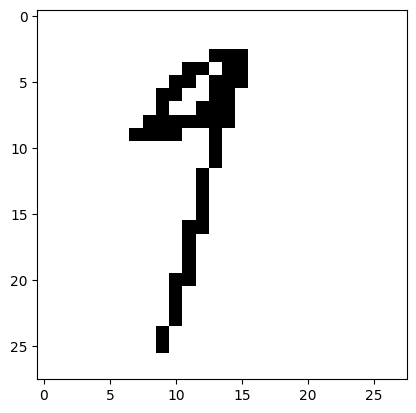

In [21]:
image_number = 1

while os.path.isfile(f"C://Users//PP's Notebook//Desktop//PythonProject//ML//handWrittenDigitRecog//Finally//digits//digit{image_number}.png"):
    try:
        img = cv2.imread(
            f"C://Users//PP's Notebook//Desktop//PythonProject//ML//handWrittenDigitRecog//Finally//digits//digit{image_number}.png")[:, :, 0]
        img = np.invert(np.array([img]))

        prediction = model.predict(img)
        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
         
    except:
        print("Error!")
    finally:
        image_number += 1

        